# A customer retention strategy

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data
One of the most common problems gyms face is customer churn.In order to fight churn, Model Fitness has digitized a number of its customer profiles. Our task is to analyze them and come up with a customer retention strategy.


# Goal

We should:
- Learn to predict the probability of churn (for the upcoming month) for each customer
- Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service:
- Identify target groups
- Suggest measures to cut churn
- Describe any other patterns you see with respect to interaction with customers

## Initialization

In [1]:
# Loading all libraries
import pandas as pd
import numpy as np

#Standard libraries for data visualization:
import seaborn as sns
sns.set(style="whitegrid")
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
import plotly.express as px
from plotly import graph_objects as go 



from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

##  Download the data

In [2]:
# Colecting data and laading data file into DataFrame
df = pd.read_csv('/datasets/gym_churn_us.csv')

## Explore initial data

Model Fitness provided you with CSV files containing data on churn for a given month and information on the month preceding it. The dataset includes the following fields:
- 'Churn' — the fact of churn for the month in question

1.  Current dataset fields:
- User data for the preceding month
- 'gender'
- 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located
- 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
- Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
- 'Phone' — whether the user provided their phone number
- 'Age'
- 'Lifetime' — the time (in months) since the customer first came to the gym

2. Data from the log of visits and purchases and data on current membership status
- 'Contract_period' — 1 month, 3 months, 6 months, or 1 year
- 'Month_to_end_contract' — the months remaining until the contract expires
- 'Group_visits' — whether the user takes part in group sessions
- 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime
- 'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month
- 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

##  Carry out Exploratory Data Analysis (EDA)
Let's explore each df to get an initial understanding of the data and do necessary corrections to each table if necessary.

In [3]:
# Prind sample of data
df.head()

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

In [4]:
df.shape

(4000, 14)

In [5]:
# Print General information and summury of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [6]:
# Check for missing values
df.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

- There is no missing values in dataset
- The data is represented int64, float64 which is numerical data type
- We have 4000 rows and 15 columns

In [7]:
# Study the mean values and standard deviation using the describe() method.
df.describe() 

gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [8]:
# Converting columns names in appropriate format(lowercase)
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [9]:

# Dedine finction and get overview of the data
def dataoveriew(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
    
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  4000

Number of features: 14

Data Features:
['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']

Missing values: 0

Unique values:
gender                                  2
near_location                           2
partner                                 2
promo_friends                           2
phone                                   2
contract_period                         3
group_visits                            2
age                                    23
avg_additional_charges_total         4000
month_to_end_contract                  12
lifetime                               29
avg_class_frequency_total            3913
avg_class_frequency_current_month    3820
churn                                   2
dtype: int64




Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

Plot bar histograms and feature distributions for those who left (churn) and those who stayed.


Build a correlation matrix and display it.

### Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

In [10]:
# Check target variable distribution, Distribution of churn 
df['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

In [11]:
import plotly.express as px

target_instance = df["churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'category'})
fig = px.pie(target_instance, values='churn', names='category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

- We’re trying to predict users that left the company in the previous month. 
- It’s a binary classification problem with an unbalanced target.

- Churn: 0– 73.5%(Who stayed)
- Churn: 1– 26.5%(Who left)

####  Gender

In [12]:
# look at mean value based on identified factor
df.groupby(['churn'])['gender'].mean()

churn
0    0.510037
1    0.510839
Name: gender, dtype: float64

In [13]:
#Groupby the categorical feature
temp_df = df.groupby(["gender", 'churn']).size().reset_index()
temp_df = temp_df.rename(columns={0:'count'})
temp_df

gender  churn  count
0       0      0   1440
1       0      1    519
2       1      0   1499
3       1      1    542

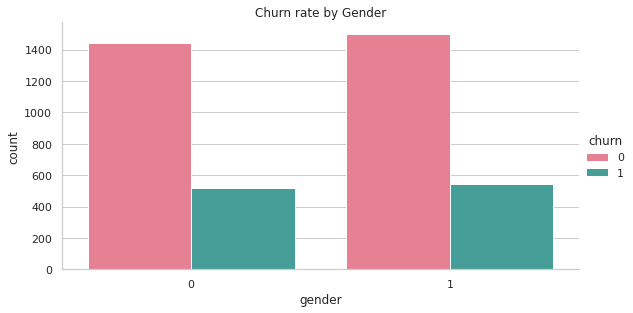

In [14]:
sns.catplot(x='gender', y='count', hue='churn', data=temp_df, kind='bar',height=4, aspect=2,palette="husl")
ax = plt.gca()
ax.set_title("Churn rate by Gender")
plt.show()

- Female customers are more likely to churn vs. male customers, but the difference is minimal (~0.8%).


#### Near_Location

In [15]:
df.groupby(['near_location'])['churn'].mean()

near_location
0    0.397415
1    0.241053
Name: churn, dtype: float64

In [16]:
#Groupby the categorical feature
temp_df1 = df.groupby(["near_location", 'churn']).size().reset_index()
temp_df1 = temp_df1.rename(columns={0:'count'})
temp_df1

near_location  churn  count
0              0      0    373
1              0      1    246
2              1      0   2566
3              1      1    815

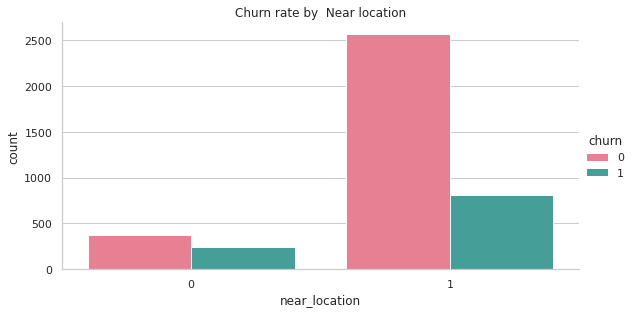

In [17]:
sns.catplot(x='near_location', y='count', hue='churn',data=temp_df1,  kind='bar',palette="husl",height=4, aspect=2)
ax = plt.gca()
ax.set_title("Churn rate by  Near location")
plt.show()

#### Partner

In [18]:
df.groupby(['partner'])['churn'].mean()

partner
0    0.333171
1    0.193631
Name: churn, dtype: float64

In [19]:
#Groupby the categorical feature
temp_df2 = df.groupby(["partner", 'churn']).size().reset_index()
temp_df2 = temp_df2.rename(columns={0:'count'})
temp_df2

partner  churn  count
0        0      0   1369
1        0      1    684
2        1      0   1570
3        1      1    377

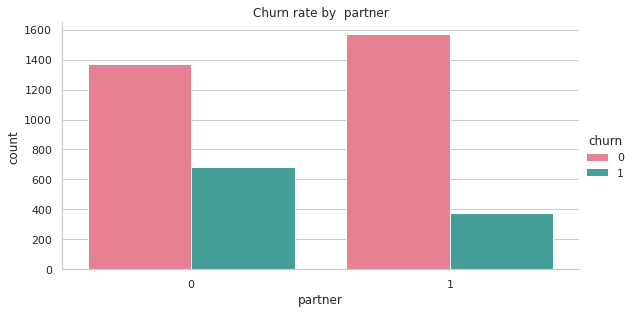

In [20]:
sns.catplot(x='partner', y='count', hue='churn',data=temp_df2,  kind='bar',palette="husl",height=4, aspect=2)
ax = plt.gca()
ax.set_title("Churn rate by  partner")
plt.show()

#### Promo_friends

In [21]:
df.groupby(['promo_friends'])['churn'].mean()

promo_friends
0    0.313087
1    0.158023
Name: churn, dtype: float64

In [22]:
#Groupby the categorical feature
temp_df3 = df.groupby(["promo_friends", 'churn']).size().reset_index()
temp_df3 = temp_df3.rename(columns={0:'count'})
temp_df3

promo_friends  churn  count
0              0      0   1900
1              0      1    866
2              1      0   1039
3              1      1    195

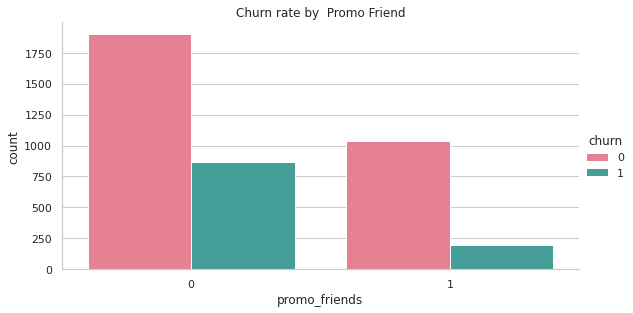

In [23]:
sns.catplot(x='promo_friends', y='count', hue='churn',data=temp_df3,  kind='bar',palette="husl",height=4, aspect=2)
ax = plt.gca()
ax.set_title("Churn rate by  Promo Friend")
plt.show()

#### Phone 

In [24]:
df.groupby(['phone'])['churn'].mean()

phone
0    0.266839
1    0.265080
Name: churn, dtype: float64

In [25]:
#Groupby the categorical feature
temp_df4= df.groupby(["phone", 'churn']).size().reset_index()
temp_df4 = temp_df4.rename(columns={0:'count'})
temp_df4

phone  churn  count
0      0      0    283
1      0      1    103
2      1      0   2656
3      1      1    958

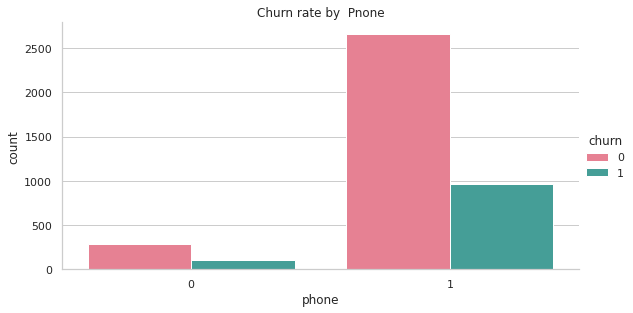

In [26]:
sns.catplot(x='phone', y='count', hue='churn',data=temp_df4,  kind='bar',palette="husl",height=4, aspect=2)
ax = plt.gca()
ax.set_title("Churn rate by  Pnone")
plt.show()

####  Age

In [27]:
display(sorted(df['age'].unique())) 

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 41]

In [28]:
# Calculate the mean and the variance 
df.groupby(['churn'])['age'].agg(['mean','median', 'var']).reset_index()

churn       mean  median       var
0      0  29.976523      30  9.059694
1      1  26.989632      27  8.381968

In [29]:
#df.groupby(['churn'])['age'].mean()display(sorted(df['dob_years'].unique())) 
#dataset.groupby('age')['churn'].value_counts()

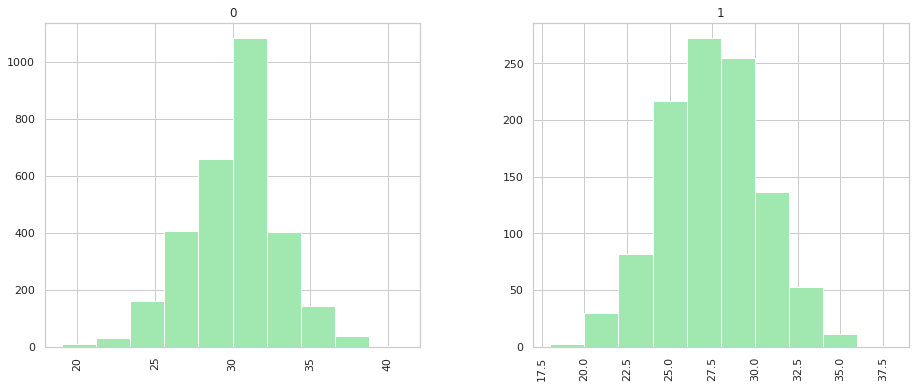

In [30]:
#df.age.plot(kind='hist',figsize=(12,10));
# Plot a histogram.
df.age.hist(by=df['churn'], figsize =(15,6),color=['#A0E8AF' ])
plt.title 
plt.show()


#### Lifetime
   

In [31]:
display(sorted(df['lifetime'].unique())) 

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 26,
 27,
 29,
 31]

In [32]:
df.groupby(['churn'])['lifetime'].agg(['mean','median', 'var']).reset_index()

churn      mean  median        var
0      0  4.711807       4  15.013921
1      1  0.990575       1   1.233873

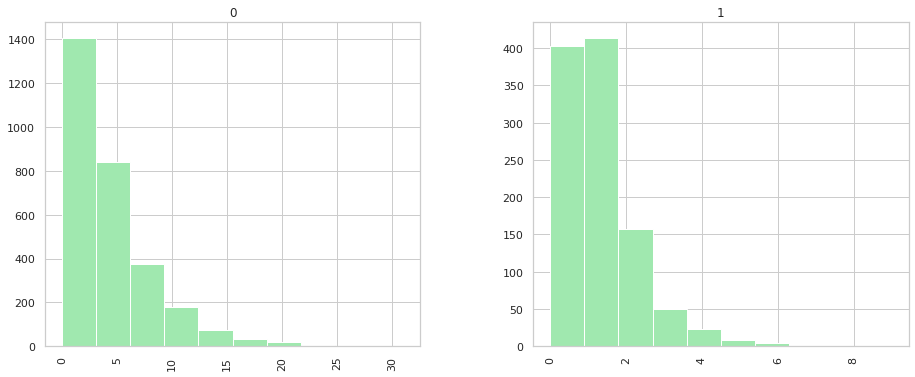

In [33]:
df.lifetime.hist(by=df['churn'], figsize =(15,6),color=['#A0E8AF' ])
plt.title 
plt.show()

In [34]:
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [35]:
# Create variable 'feature' list
feature =['gender', 'near_location', 'partner', 'promo_friends', 'phone','contract_period','group_visits']

In [36]:
# Call function enumerate() which is return index number and column number
# Display list
list(enumerate(feature))

[(0, 'gender'),
 (1, 'near_location'),
 (2, 'partner'),
 (3, 'promo_friends'),
 (4, 'phone'),
 (5, 'contract_period'),
 (6, 'group_visits')]

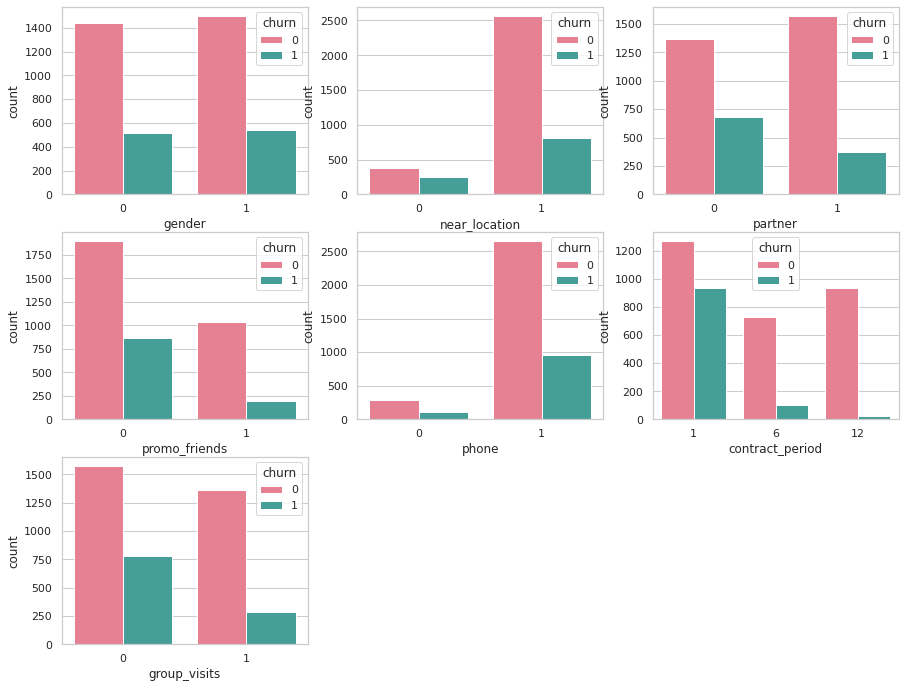

In [37]:
plt.figure(figsize =(15,20))
for i in enumerate(feature):
    plt.subplot(5,3,i[0]+1)
    sns.countplot(x = i[1], hue = 'churn', data= df, palette="husl")
    

#### Contract_period

In [38]:
df['contract_period'].value_counts()

1     2207
12     960
6      833
Name: contract_period, dtype: int64

In [39]:
df.groupby('contract_period')['churn'].mean()

contract_period
1     0.423199
6     0.124850
12    0.023958
Name: churn, dtype: float64

In [40]:
#Groupby the categorical feature
temp_df5= df.groupby(["contract_period", 'churn']).size().reset_index()
temp_df5 = temp_df5.rename(columns={0:'count'})
temp_df5

contract_period  churn  count
0                1      0   1273
1                1      1    934
2                6      0    729
3                6      1    104
4               12      0    937
5               12      1     23

In [41]:
df.groupby(['churn'])['contract_period'].agg(['mean','median', 'var']).reset_index()

churn      mean  median        var
0      0  5.747193       6  22.249545
1      1  1.728558       1   4.547004

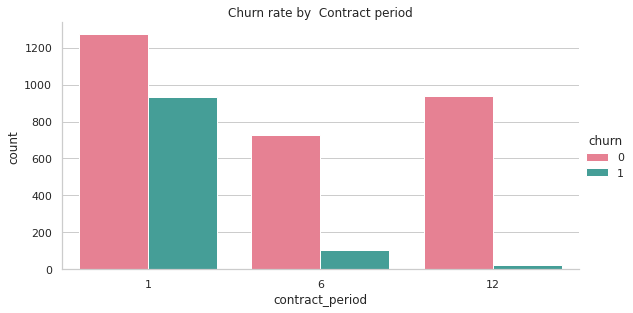

In [42]:
sns.catplot(x='contract_period', y='count', hue='churn',data=temp_df5,  kind='bar',palette="husl",height=4, aspect=2)
ax = plt.gca()
ax.set_title("Churn rate by  Contract period")
plt.show()

 - the shorter contract means higher churn rate.

####  Month_to_end_contract

In [43]:
df['month_to_end_contract'].value_counts()

1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0       23
2.0       14
Name: month_to_end_contract, dtype: int64

In [44]:
df.groupby('month_to_end_contract')['churn'].mean()

month_to_end_contract
1.0     0.423199
2.0     0.142857
3.0     0.043478
4.0     0.120690
5.0     0.146154
6.0     0.117829
7.0     0.040000
8.0     0.026316
9.0     0.013699
10.0    0.024390
11.0    0.022099
12.0    0.024809
Name: churn, dtype: float64

In [45]:
#Groupby the categorical feature
temp_df6= df.groupby(["month_to_end_contract", 'churn']).size().reset_index()
temp_df6 = temp_df6.rename(columns={0:'count'})
temp_df6.tail()

month_to_end_contract  churn  count
19                   10.0      1      2
20                   11.0      0    177
21                   11.0      1      4
22                   12.0      0    511
23                   12.0      1     13

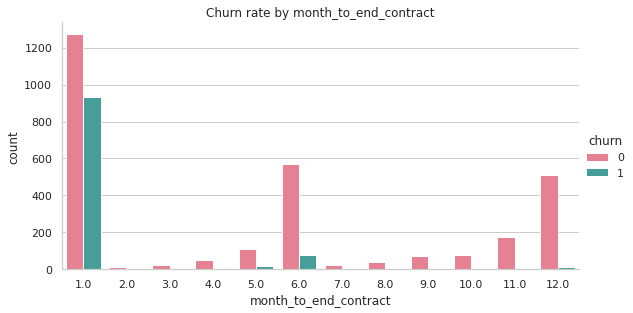

In [46]:
sns.catplot(x='month_to_end_contract', y='count', hue='churn',data=temp_df6,  kind='bar',palette="husl",height=4, aspect=2)
ax = plt.gca()
ax.set_title("Churn rate by month_to_end_contract")
plt.show()

#### Group_visits

In [47]:
df.groupby('group_visits')['churn'].mean()

group_visits
0    0.330072
1    0.172832
Name: churn, dtype: float64

In [48]:
#Groupby the categorical feature
temp_df7= df.groupby(["group_visits", 'churn']).size().reset_index()
temp_df7 = temp_df7.rename(columns={0:'count'})
temp_df7

group_visits  churn  count
0             0      0   1575
1             0      1    776
2             1      0   1364
3             1      1    285

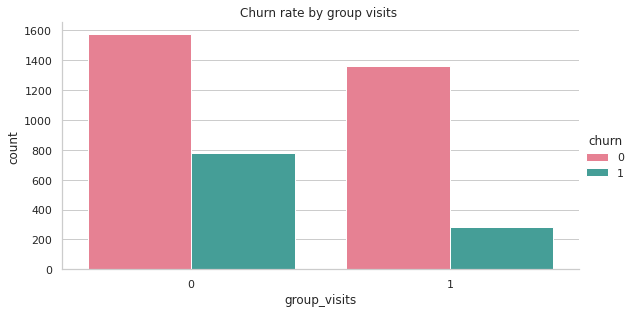

In [49]:
sns.catplot(x='group_visits', y='count', hue='churn',data=temp_df7,  kind='bar',palette="husl",height=4, aspect=2)
ax = plt.gca()
ax.set_title("Churn rate by group visits ")
plt.show()

#### Avg_class_frequency_total'

In [50]:
#Groupby the categorical feature
temp_df8= df.groupby(["avg_class_frequency_total", 'churn']).size().reset_index()
temp_df8 = temp_df8.rename(columns={0:'count'})
temp_df8

avg_class_frequency_total  churn  count
0                      0.000000      0     68
1                      0.000000      1     20
2                      0.002760      0      1
3                      0.006436      0      1
4                      0.008824      0      1
...                         ...    ...    ...
3909                   5.079242      0      1
3910                   5.141852      0      1
3911                   5.410054      0      1
3912                   5.421898      0      1
3913                   6.023668      0      1

[3914 rows x 3 columns]

In [51]:
# # Calculate the mean and the variance 
#df.groupby(['churn'])['age'].mean()display(sorted(df['dob_years'].unique())) 
df.groupby(['churn'])['avg_class_frequency_total'].agg(['mean','median', 'var']).reset_index()

churn      mean    median       var
0      0  2.024876  2.043252  1.032269
1      1  1.474995  1.491187  0.482615

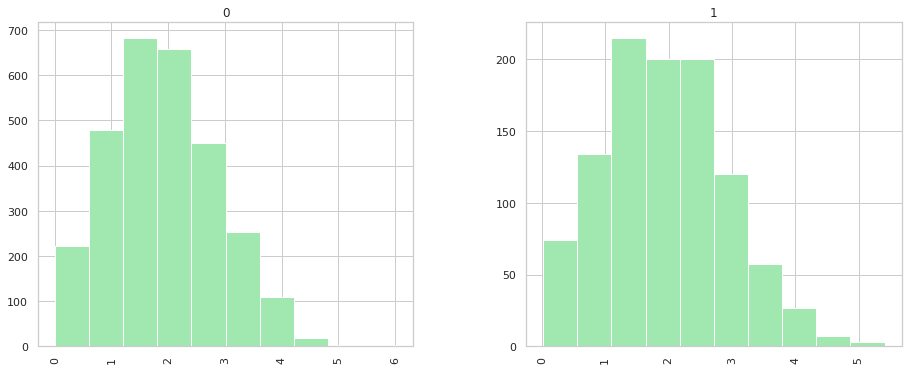

In [52]:
temp_df8.avg_class_frequency_total.hist(by=df['churn'], figsize =(15,6),color=['#A0E8AF' ])
plt.title 
plt.show()

#### Avg_additional_charges_total

In [53]:
df.groupby(['avg_additional_charges_total']).churn.mean()

avg_additional_charges_total
0.148205      1
0.171862      0
0.251606      0
0.334824      1
0.362153      0
             ..
488.708175    0
496.172222    0
515.392606    0
534.256182    0
552.590740    0
Name: churn, Length: 4000, dtype: int64

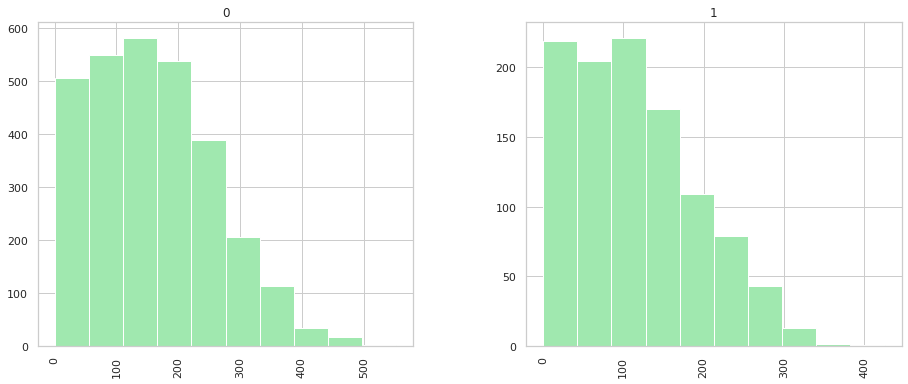

In [54]:
df.avg_additional_charges_total.hist(by=df['churn'], figsize =(15,6),color=['#A0E8AF' ])
plt.title 
plt.show()

###  Build a correlation matrix and display it.

In [56]:
# calculate correlation matrix
cm = df.corr()
cm


gender  near_location   partner  \
gender                             1.000000       0.006699 -0.010463   
near_location                      0.006699       1.000000 -0.005119   
partner                           -0.010463      -0.005119  1.000000   
promo_friends                     -0.005033       0.210964  0.451960   
phone                             -0.008542      -0.015763  0.009970   
contract_period                    0.000502       0.150233  0.306166   
group_visits                       0.017879       0.154728  0.022710   
age                                0.013807       0.058358  0.047480   
avg_additional_charges_total      -0.009334       0.040761  0.022941   
month_to_end_contract             -0.001281       0.143961  0.294632   
lifetime                           0.013579       0.070921  0.061229   
avg_class_frequency_total          0.014620       0.043127  0.024938   
avg_class_frequency_current_month  0.009156       0.062664  0.045561   
churn                              0.000708      -0.128098 -0.157986   

                                   promo_friends     phone  contract_period  \
gender                                 -0.005033 -0.008542         0.000502   
near_location                           0.210964 -0.015763         0.150233   
partner                                 0.451960  0.009970         0.306166   
promo_friends                           1.000000  0.001982         0.244552   
phone                                   0.001982  1.000000        -0.006893   
contract_period                         0.244552 -0.006893         1.000000   
group_visits                            0.120170 -0.010099         0.169991   
age                                     0.050113 -0.011403         0.138249   
avg_additional_charges_total            0.036898  0.009279         0.111445   
month_to_end_contract                   0.239553 -0.011196         0.973064   
lifetime                                0.072721 -0.018801         0.170725   
avg_class_frequency_total               0.028063  0.008340         0.096211   
avg_class_frequency_current_month       0.053768  0.013375         0.159407   
churn                                  -0.162233 -0.001177        -0.389984   

                                   group_visits       age  \
gender                                 0.017879  0.013807   
near_location                          0.154728  0.058358   
partner                                0.022710  0.047480   
promo_friends                          0.120170  0.050113   
phone                                 -0.010099 -0.011403   
contract_period                        0.169991  0.138249   
group_visits                           1.000000  0.080934   
age                                    0.080934  1.000000   
avg_additional_charges_total           0.032079  0.080240   
month_to_end_contract                  0.163703  0.134511   
lifetime                               0.075853  0.164693   
avg_class_frequency_total              0.056695  0.119953   
avg_class_frequency_current_month      0.075923  0.183095   
churn                                 -0.175325 -0.404735   

                                   avg_additional_charges_total  \
gender                                                -0.009334   
near_location                                          0.040761   
partner                                                0.022941   
promo_friends                                          0.036898   
phone                                                  0.009279   
contract_period                                        0.111445   
group_visits                                           0.032079   
age                                                    0.080240   
avg_additional_charges_total                           1.000000   
month_to_end_contract                                  0.113958   
lifetime                                               0.079028   
avg_class_frequency_total                         

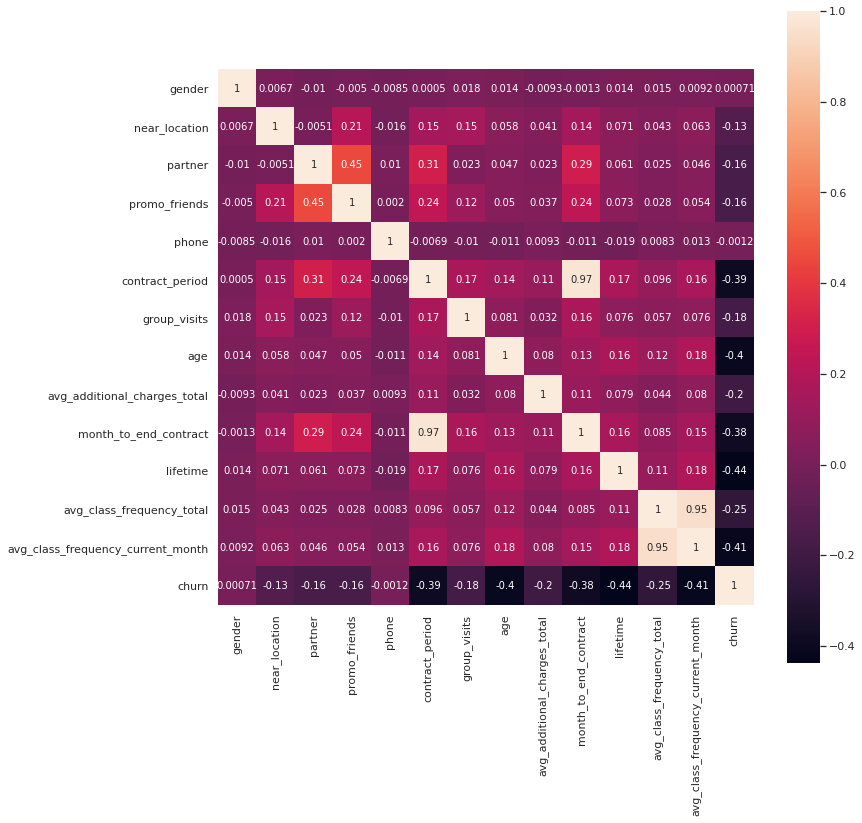

In [57]:
# build and render a correlation matrix


# plot an annotated heatmap for the correlation matrix
plt.figure(figsize =(12,12))
sns.heatmap(cm, annot = True, square=True)

ax.set_ylim(7, 0) # correcting "ragged" heatmap fields in the latest version of the library
plt.show()

Use these graphs(feature-target variable diagrams for each feature) to answer the following questions:
    
Are there any clear outliers among the features?

Are there any features with strong mutual correlation?

Are there any features that have a strong correlation with "churn," the target variable?

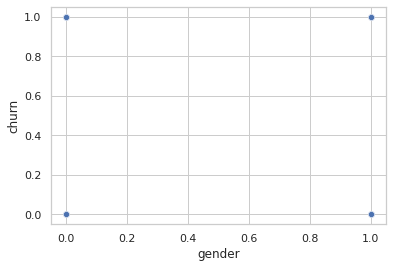

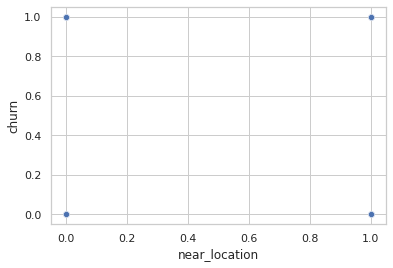

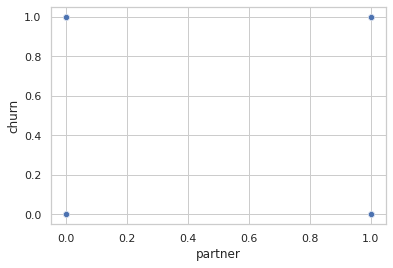

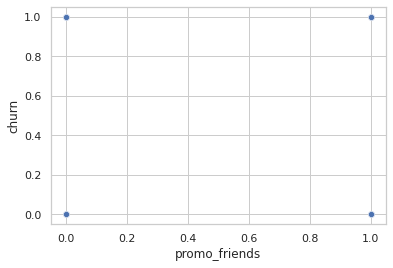

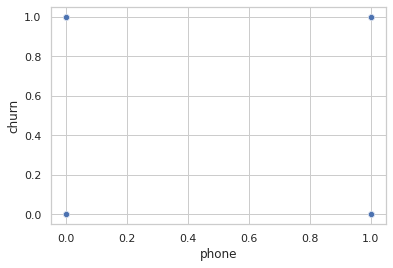

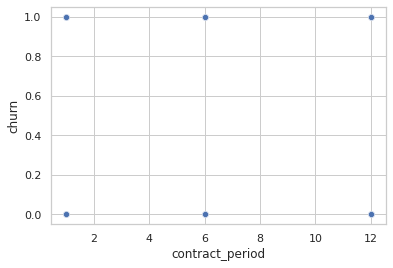

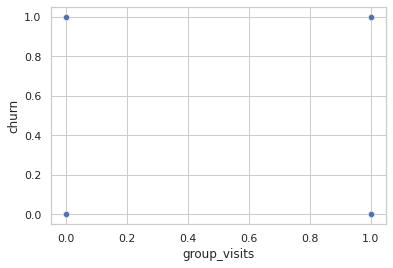

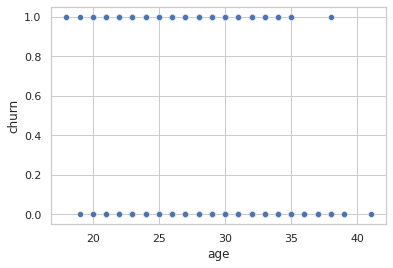

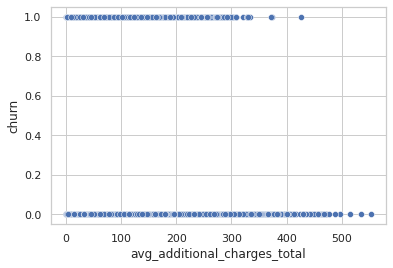

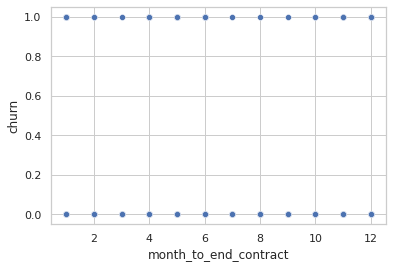

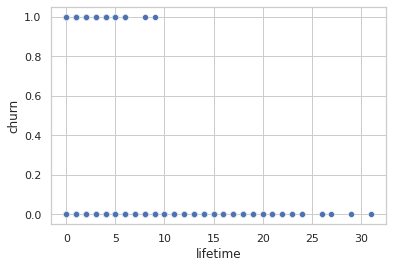

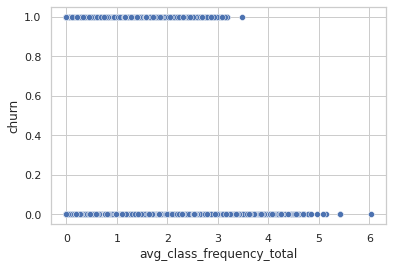

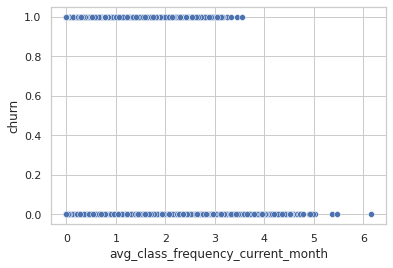

In [58]:
fig, ax = plt.subplots()
# plot paired distribution feature-traget variable diagrams for each feature

for col in df.drop('churn', axis=1).columns:
    sns.scatterplot(x= df[col],   y=df[ "churn"])
    plt.show()

##  Build a model to predict user churn
Build a binary classification model for customers where the target feature is the user's leaving next month

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score


### Divide the data into train and validation sets using the train_test_split() function

In [61]:
# divide the data into features (the X matrix) and a target variable (y)
X = df.drop('churn', axis =1)
y = df['churn']

# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

# create a StandardScaler object and apply it to the train set
# train the scaler and transform the matrix for the train set
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

# apply standardization to the feature matrix for the test set
X_test_st = scaler.transform(X_test)


### Train the model on the train set with two methods:
- logistic regression
- random forest

#### Logistic regression

In [62]:
# define the model's algorithm 
model = LogisticRegression()

# train your model
model.fit(X_train_st, y_train)

# use the trained model to make forecasts
predictions = model.predict(X_test_st) 

#Estimate the probability that an object from the validation set belongs to the second class
#(class "1" from the two classes "0" and "1") and store it in probabilities.

probabilities = model.predict_proba(X_test)[:,1]
probabilities 


array([6.53830801e-090, 2.37437311e-027, 7.20718871e-029, 1.16059707e-049,
       2.70507660e-047, 1.79321476e-069, 6.64700792e-078, 2.43985434e-079,
       1.12221322e-041, 2.07658681e-066, 1.49239336e-053, 1.18495980e-066,
       1.98685942e-077, 1.02244573e-070, 2.73608530e-118, 5.47051359e-063,
       1.47760310e-081, 1.94820109e-100, 2.94174406e-051, 1.18554377e-061,
       4.76981236e-027, 3.30169504e-039, 6.02645378e-069, 2.35618416e-027,
       1.07189106e-051, 2.79274763e-022, 1.37973829e-111, 2.00579541e-031,
       3.34410920e-073, 1.24308136e-094, 4.14224762e-054, 5.63105413e-047,
       6.28584632e-056, 1.11256656e-031, 1.29952310e-080, 2.91921991e-030,
       3.71051143e-056, 1.10757345e-041, 1.27009745e-053, 1.03197646e-049,
       3.91612163e-101, 6.01598899e-065, 7.73003016e-079, 6.18808844e-077,
       3.71888402e-071, 3.79592954e-071, 2.76650761e-072, 1.15480523e-040,
       8.68099144e-046, 1.85139451e-031, 1.33880390e-077, 1.21061227e-038,
       2.04531155e-049, 4

#### Random forest

In [63]:
from sklearn.metrics import r2_score
# define the model as an element of the RandomForestRegressor class (random_state=0)
model = (
    RandomForestRegressor(random_state=0)
) 
# train the model  using train data
model.fit(X_train_st,y_train) 

# use the trained model to make forecasts
predictions = model.predict(X_test_st)  # make a forecast for test data using the model

# estimate R-squared using test data and print the result
r2 = r2_score(y_test,predictions)# write your code here
print('R-squared value: ', r2)

R-squared value:  0.7000469814423302


In [64]:
# define the algorithm for the new random forest model
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0)

# train the random forest model
rf_model.fit(X_train_st, y_train)

# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities =rf_model.predict_proba(X_test_st)[:,1] 

### Evaluate accuracy, precision, and recall for both models using the validation data.

Use them to compare the models.

Which model gave better results?

Remember to indicate the random_state parameter when dividing data and defining the algorithm.

In [65]:
# define the function that will output our metrics
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


# define the algorithm for the logistic regression model
lr_model = LogisticRegression(random_state=0)
# train the model
lr_model.fit(X_train_st, y_train)
# use the trained model to make predictions
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# print all metrics
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')



# define the algorithm for the new decision tree model
tree_model = DecisionTreeClassifier(random_state=0)
# train the decision tree model
tree_model.fit(X_train_st, y_train)
# use the trained model to make predictions
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test_st)[:,1]
# print all metrics
print_all_metrics(y_test, tree_predictions, tree_probabilities, title='Metrics for decision tree:')


# define the algorithm for the new random forest model
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0)
# train the random forest model
rf_model.fit(X_train_st, y_train)
# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities =rf_model.predict_proba(X_test_st)[:,1] 
# print all metrics
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')


# do the same for the gradient boosting model
gb_model = GradientBoostingClassifier(n_estimators = 100,random_state = 0) # write your code here
# train the random forest model
gb_model.fit(X_train_st, y_train)
# use the trained model to make predictions
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities =gb_model.predict_proba(X_test_st)[:,1] 
# print all metrics
print_all_metrics(y_test, gb_predictions, gb_probabilities, title = 'Metrics for gradient boosting:')


Metrics for logistic regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97
Metrics for decision tree:
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.80
	F1: 0.80
	ROC_AUC: 0.87
Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97
Metrics for gradient boosting:
	Accuracy: 0.93
	Precision: 0.88
	Recall: 0.84
	F1: 0.86
	ROC_AUC: 0.98


In [66]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# declare the list of models
models = [LogisticRegression(),RandomForestRegressor(), GradientBoostingRegressor()]


In [67]:
# train the final model

final_model = GradientBoostingRegressor()
final_model.fit(X_train,y_train)

y_pred = final_model.predict(X_test_st)

     
# create a DataFrame with feature names and importance(by the fitted attribute feature_importances_ )
features = pd.DataFrame({"feature": X_train.columns, "importance":final_model.feature_importances_ }).sort_values(by = "importance", ascending = False)# use the coef_ method


display(features)


feature  importance
10                           lifetime    0.475700
12  avg_class_frequency_current_month    0.182436
11          avg_class_frequency_total    0.108425
7                                 age    0.082594
9               month_to_end_contract    0.063646
5                     contract_period    0.057843
8        avg_additional_charges_total    0.021918
6                        group_visits    0.005173
3                       promo_friends    0.001410
1                       near_location    0.000521
4                               phone    0.000156
0                              gender    0.000131
2                             partner    0.000046

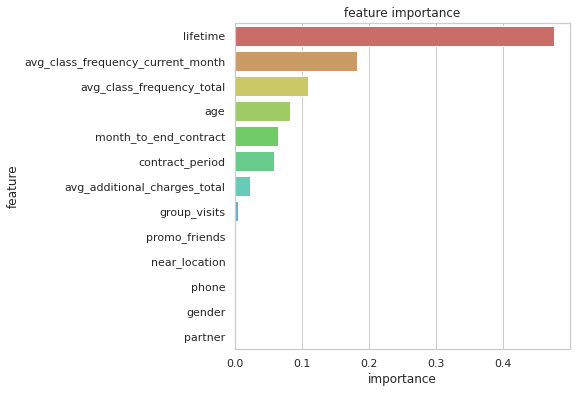

In [68]:
# plot feature importance

plt.figure(figsize=(6, 6)) 
ax = sns.barplot(x='importance',y='feature', data=features ,palette = 'hls') 
plt.title( 'feature importance')
plt.show()

#### Conclusion

- By using Logistic regression model, we have achieved 92% accuracy, Random forest - 92%:

##  Create user clusters

Set aside the column with data on churn and identify object (user) clusters:

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [70]:
scaler = StandardScaler() # creating a scaler class object (normalizer)
x_sc = scaler.fit_transform(df.drop(columns = ['churn'])) # training the normalizer and transforming the dataset 

In [71]:
display(x_sc[:10])

array([[ 0.97970588,  0.42788074,  1.02686062,  1.49716101, -3.05985201,
         0.28989014,  1.19403206, -0.0565538 , -1.37753121,  0.16160501,
        -0.19332863, -1.91191971, -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , -0.66793083,  0.32681319,
         1.60882159,  1.19403206,  0.55732732, -0.35021325,  1.83194105,
         0.87368001,  0.04517569,  0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, -0.66793083,  0.32681319,
        -0.8092194 , -0.83749845, -0.36349436, -0.1815923 , -0.79287273,
        -0.46008079, -0.02049263, -0.02901851],
       [-1.0207145 ,  0.42788074,  1.02686062,  1.49716101,  0.32681319,
         1.60882159,  1.19403206,  1.17120844, -0.87472237,  1.83194105,
        -0.46008079,  1.36465509,  1.51045005],
       [ 0.97970588,  0.42788074,  1.02686062,  1.49716101,  0.32681319,
        -0.8092194 , -0.83749845, -0.97737548,  0.5336998 , -0.79287273,
        -0.19332863, -0.78707638, -0.61454183],
       [ 0.97970588,  0.427880

Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram.

Note: rendering the dendrogram may take time!
    
Use the resulting graph to estimate the number of clusters you can single out

In [72]:
linked = linkage(x_sc, method = 'ward') 

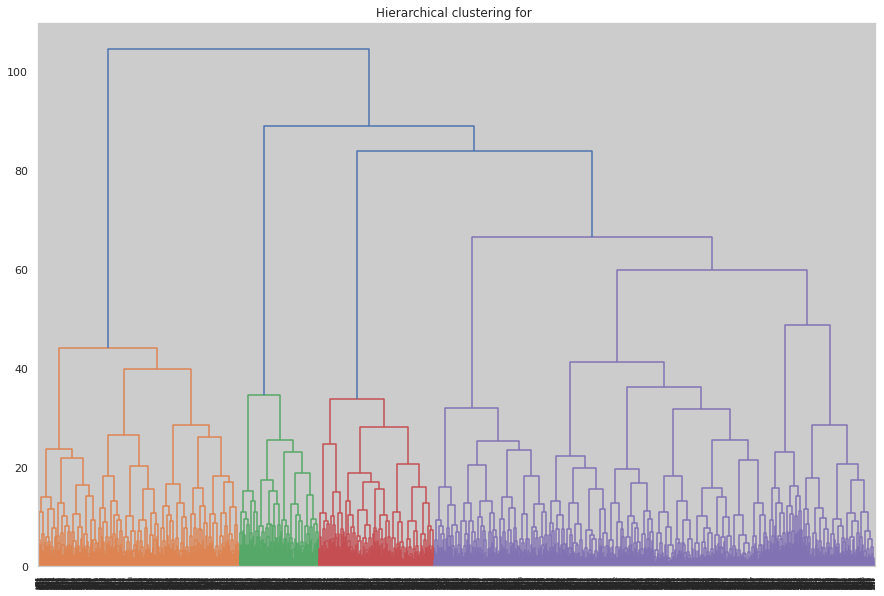

In [73]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for ')
plt.show() 

#### K-means

Train the clustering model with the K-means algorithm and predict customer clusters.

(Let the number of clusters be n=5, so that it'll be easier to compare our results  
 
However, in real life, no one will give us such hints, so you'll have to decide based on the graph from the previous step.)

In [74]:

# standardize the data
sc = StandardScaler()
x_sc = sc.fit_transform(df) 


# define the k_means model with 5 clusters
km =KMeans(n_clusters = 5) 

# predict the clusters for observations (the algorithm assigns them a number from 0 to 2)
labels = km.fit_predict(x_sc)


# store cluster labels in the field of our dataset
df['cluster_km'] = labels

# get the statistics of the mean feature values per cluster
print(df.groupby(['cluster_km']).mean())
    

              gender  near_location   partner  promo_friends     phone  \
cluster_km                                                               
0           0.474419       0.827907  0.447674       0.254651  1.000000   
1           0.501548       0.939112  0.768834       0.564499  1.000000   
2           0.506908       0.759830  0.341126       0.179596  0.996812   
3           0.553066       0.839623  0.372642       0.213443  0.998821   
4           0.526178       0.869110  0.471204       0.308901  0.000000   

            contract_period  group_visits        age  \
cluster_km                                             
0                  2.663953      0.382558  30.015116   
1                 11.164087      0.559340  29.900929   
2                  1.566419      0.257173  26.907545   
3                  2.714623      0.438679  29.978774   
4                  4.816754      0.429319  29.340314   

            avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster_km 

#### Look at the mean feature values for clusters. Does anything catch your eye?

Look at the mean feature values for clusters. Does anything catch your eye?

Plot distributions of features for the clusters. Do you notice anything?

Calculate the churn rate for each cluster (use the groupby() method).

Do they differ in terms of churn rate?

Which clusters are prone to leaving, and which are loyal?

In [75]:
# get the statistics of the mean feature values per cluster
df_cluster = df.groupby(['cluster_km']).mean().reset_index()
df_cluster

cluster_km    gender  near_location   partner  promo_friends     phone  \
0           0  0.474419       0.827907  0.447674       0.254651  1.000000   
1           1  0.501548       0.939112  0.768834       0.564499  1.000000   
2           2  0.506908       0.759830  0.341126       0.179596  0.996812   
3           3  0.553066       0.839623  0.372642       0.213443  0.998821   
4           4  0.526178       0.869110  0.471204       0.308901  0.000000   

   contract_period  group_visits        age  avg_additional_charges_total  \
0         2.663953      0.382558  30.015116                    153.931052   
1        11.164087      0.559340  29.900929                    161.632626   
2         1.566419      0.257173  26.907545                    114.993470   
3         2.714623      0.438679  29.978774                    159.619755   
4         4.816754      0.429319  29.340314                    144.517762   

   month_to_end_contract  lifetime  avg_class_frequency_total  \
0               2.476744  4.675581                   1.176941   
1              10.211558  4.700722                   2.014098   
2               1.513284  0.975558                   1.448150   
3               2.502358  4.591981                   2.924487   
4               4.502618  3.955497                   1.857525   

   avg_class_frequency_current_month     churn  
0                           1.175862  0.001163  
1                           2.008880  0.015480  
2                           1.025562  0.997875  
3                           2.931008  0.007075  
4                           1.727260  0.261780

#### Ploting graphs for each feature where we can see cluster difference

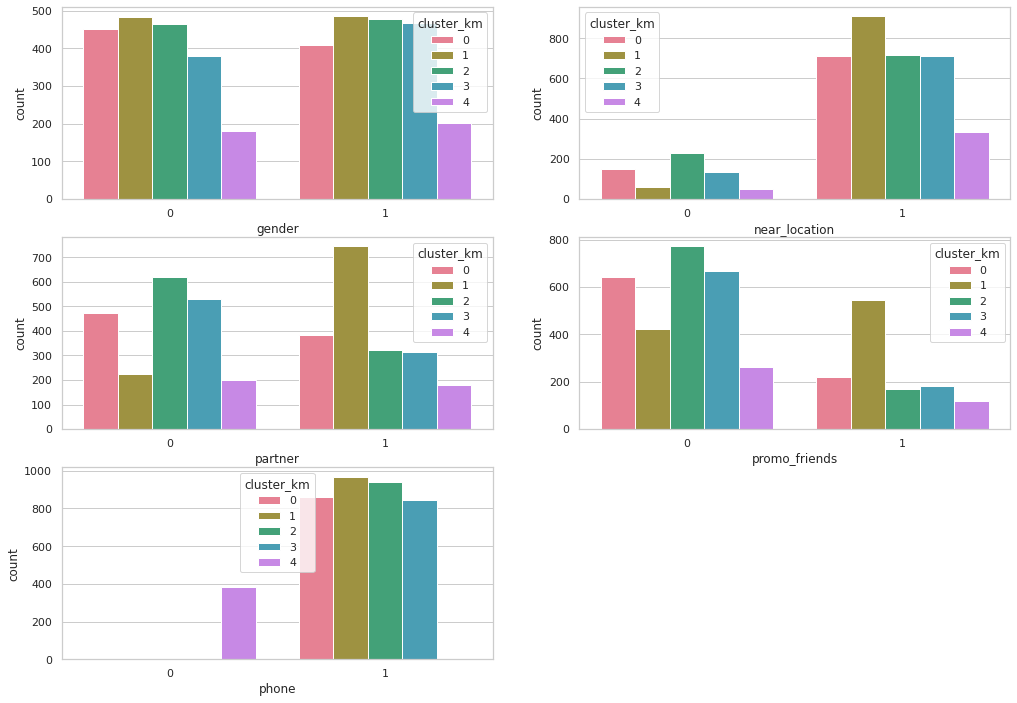

In [76]:
# Create variable 'feature' list
feature =['gender', 'near_location', 'partner', 'promo_friends', 'phone']

plt.figure(figsize =(17,12))
for i in enumerate(feature):
    plt.subplot(3,2,i[0]+1)
    sns.countplot(x = i[1], hue = 'cluster_km', data= df, palette="husl")
    

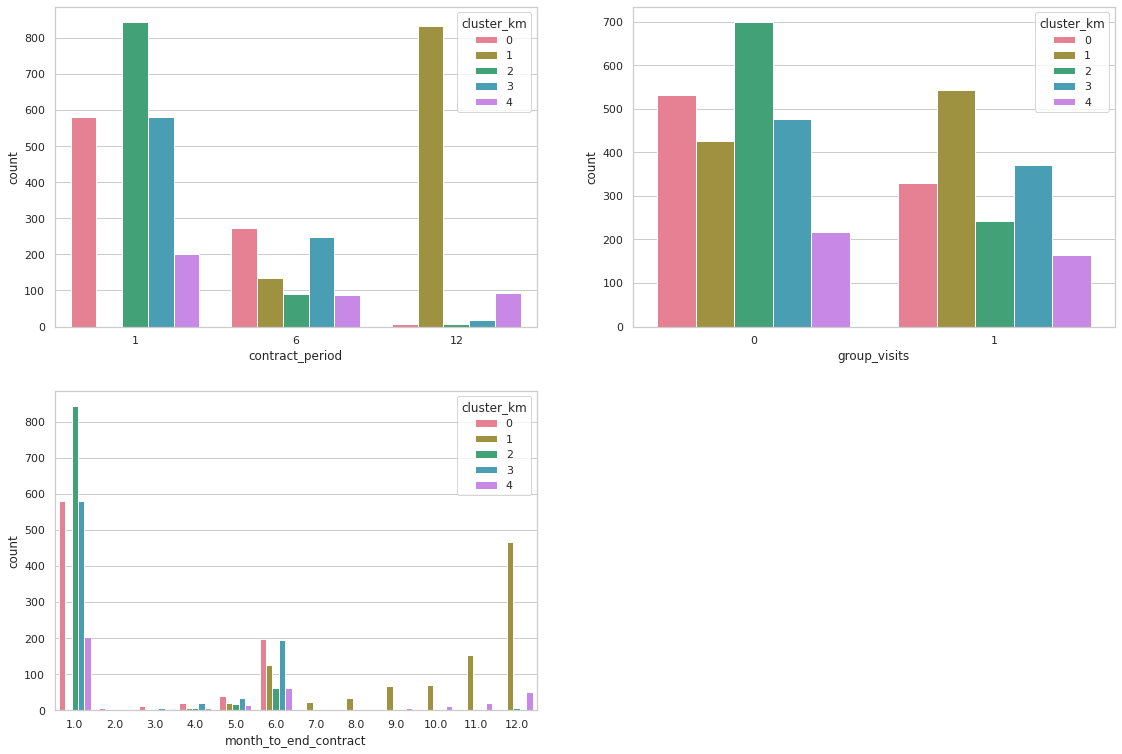

In [77]:
feature1 =['contract_period', 'group_visits','month_to_end_contract']
plt.figure(figsize =(19,20))
for i in enumerate(feature1):
    plt.subplot(3,2,i[0]+1)
    sns.countplot(x = i[1], hue = 'cluster_km', data= df, palette="husl")
   

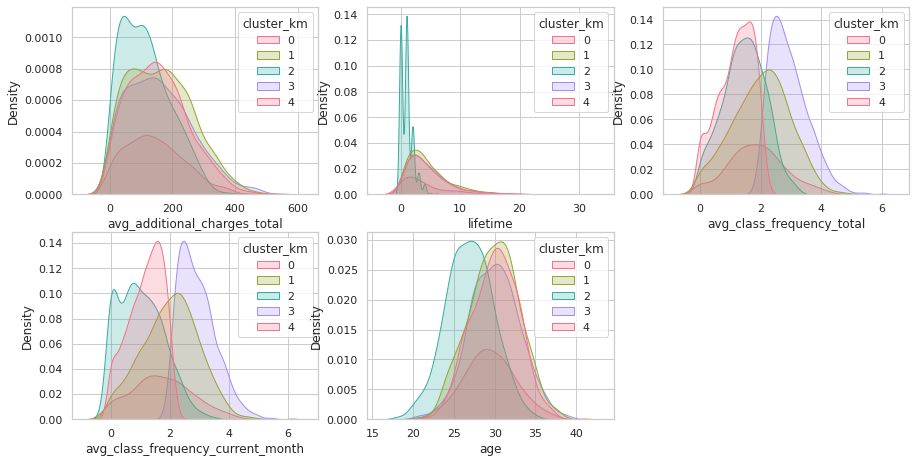

In [78]:
feature2 =['avg_additional_charges_total',
           'lifetime', 
           'avg_class_frequency_total',
           'avg_class_frequency_current_month',
           'age']
plt.figure(figsize =(15,20))
for i in enumerate(feature2):
    plt.subplot(5,3,i[0]+1)
    sns.kdeplot(x = i[1], hue = 'cluster_km', data= df, palette="husl",shade=True)

#### Plot distributions of features for the clusters. Do you notice anything?

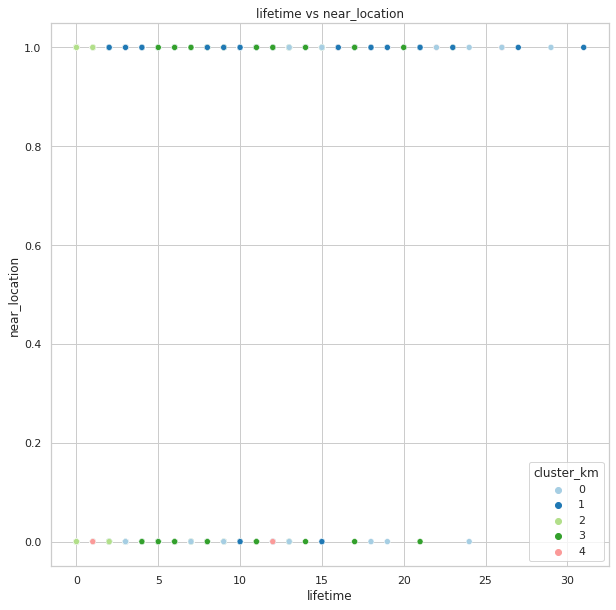

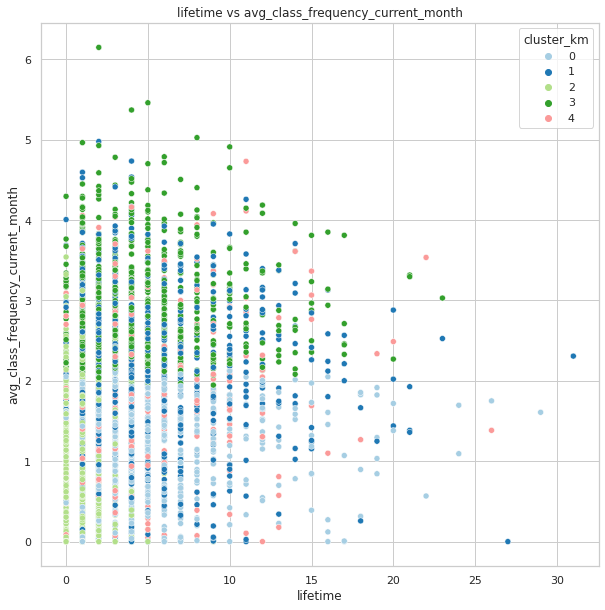

In [79]:

# define the function for rendering graphs of paired features for the clusters
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(x =df[x_name], y = df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()




# render the graph for the paired "lifetime" and "avg_additional_charges_tota" features
show_clusters_on_plot(df,'lifetime', 'near_location',
                     'cluster_km')

# render the graph for the paired "avg_class_frequency_total" and "avg_class_frequency_current_month" features
show_clusters_on_plot(df, 'lifetime',
                     'avg_class_frequency_current_month', 'cluster_km')

In [80]:
# calculate the silhouette score for the clustering
from sklearn.metrics import silhouette_score

print('Silhouette_score: {:.2f}'.format(silhouette_score(x_sc, labels)))

Silhouette_score: 0.13


#### Calculate the churn rate for each cluster (using the groupby() method).Do they differ in terms of churn rate?

In [81]:
churn = df.groupby(['cluster_km']).agg({'gender':'count', 'churn':'sum'})
churn.columns = ['num_customers', 'churn_amount']
churn['churn_rate_percent'] = ((churn['churn_amount'] / churn['num_customers']) * 100).round(2)
churn.reset_index()

cluster_km  num_customers  churn_amount  churn_rate_percent
0           0            860             1                0.12
1           1            969            15                1.55
2           2            941           939               99.79
3           3            848             6                0.71
4           4            382           100               26.18

- The clusters are differ in terms of churn rate
- The highest of churn rate have cluster 0 with 99,79%, then goes cluster 4 with 26.18%

## Come up with conclusions and basic recommendations on working with customers

1.In the data's preparation & exploration stage:

- The dataset contains 4000 rows and 16 columns .
- The dataset represented as numerical values int64 and float64
- We observed missing values of columns in Dataframe
- There is no missing values in our dataset

2.In analysis stage to answer our questions we got next conclusion:
 
- We build Logistic Regression and  Random Forest models to predict user churn the probability of churn (for the upcoming month) for each customer
- By using Logistic regression model, we have achieved 92% accuracy.

- The typical user portraits:
- By trainng the clustering model with the K-means algorithm and predict customer clusters
- cluster 0 
- cluster 1 
- cluster 2 
- cluster 3 
- cluster 4
 - The most churn rate in cluster 0 is 99.77%, then goes cluster 4 with churn rate 26.18%
- We found that typical Churned customers visited the gym less often, had shorter contract periods, didn't attend the group sessions frequently and weren't referred to the gym from a partner company or a friend.

- The active customers mostly signed up through a discount offer, signed longer contract and took part in group sessions.

- Having analyzed the factors that impact churn most are liftime and demographic feature like location .

